In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Simplest Fourier model

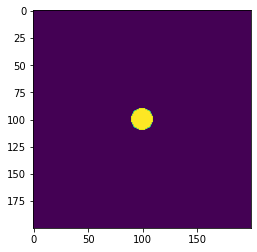

In [20]:
d = 200
sampling_grid = torch.linspace(-1, 1, d)
sampling_x, sampling_y = torch.meshgrid(sampling_grid, sampling_grid)

pupil_radius = 0.1
pupil0 = sampling_x**2 + sampling_y**2 < pupil_radius**2
plt.imshow(pupil0)

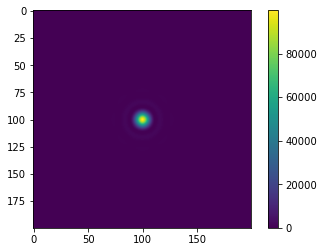

In [23]:
psf0 = torch.fft.fftshift(torch.abs(torch.fft.fft2(torch.fft.ifftshift(pupil0)))**2)
plt.imshow(psf0)
plt.colorbar();

# Generation of donut PSF

By using a phase ramp in Fourier space

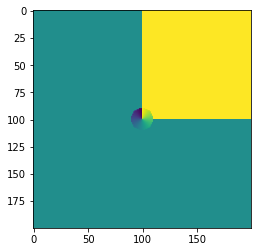

In [27]:
thetas = torch.atan2(sampling_y, sampling_x)
pupil = pupil0 * torch.exp(1j * thetas)
plt.imshow(torch.angle(pupil))

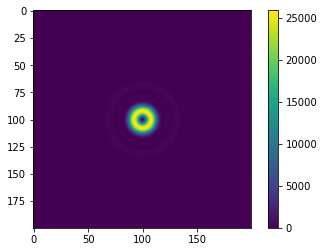

In [28]:
psf = torch.fft.fftshift(torch.abs(torch.fft.fft2(torch.fft.ifftshift(pupil)))**2)
plt.imshow(psf)
plt.colorbar();

# Z-stack with defocus

In [71]:
z_range = 2000
n_z = 100
z_stack = torch.linspace(-z_range, +z_range, n_z)
psf_stack = torch.empty(d, d, n_z)
for (i_z, current_z) in enumerate(z_stack):
    z_phase = current_z * torch.sqrt(torch.maximum(1 - sampling_x**2 - sampling_y**2, torch.Tensor([0])))
    pupil = pupil0 * torch.exp(1j * thetas + 1j * z_phase)
    psf_stack[:, :, i_z] = torch.fft.fftshift(torch.abs(torch.fft.fft2(torch.fft.ifftshift(pupil)))**2)


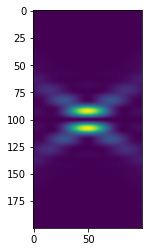

In [72]:
plt.imshow(psf_stack[100, :, :]);